<a href="https://colab.research.google.com/github/Anriod/Applicant_Ranking/blob/master/jobs_full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
from google.colab import drive
import math
import string
import datetime
import pandas as pd

In [0]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
os.chdir('drive/My Drive/job_rec')

In [0]:
def remove_nan(x):
  if (isinstance(x,float) and math.isnan(x)) or x == None or x == "":
    return 0
  else:
    return x

In [0]:
from html.parser import HTMLParser

In [0]:

class MLStripper(HTMLParser):
    def __init__(self):
        super().__init__()
        self.reset()
        self.fed = []
    def handle_data(self, d):
        self.fed.append(d)
    def get_data(self):
        return ''.join(self.fed)

def strip_tags(html):
    if isinstance(html,str):
      s = MLStripper()
      s.feed(html)
      return s.get_data()
    else:
      return html

In [0]:
tr =  str.maketrans(string.punctuation," "*len(string.punctuation))

In [0]:
def clean(x):
  if isinstance(x,str):
    x=x.replace("\\r", " ")
    x = x.replace("\xa0"," ")
    
    return x
  else:
    return x


In [0]:
os.listdir()

['test_users.tsv',
 'popular_jobs.py',
 'window_dates.tsv',
 'splitjobs',
 'users.tsv',
 'user_history.tsv',
 'popular_jobs.csv',
 'apps.tsv',
 'jobs.tsv',
 'final_userdata.csv',
 'jobs_current.csv',
 'GoogleNews-vectors-negative300.bin',
 'applicants.csv',
 'final_jobs.csv',
 'users_final.csv',
 'regression_training.npy',
 'regression_training_output.npy']

In [0]:
os.chdir("splitjobs")
datasets = {}
datasets["splits"] = pd.read_csv("jobs1.tsv",delimiter="\t",error_bad_lines=False)
os.chdir('..')
files = os.listdir()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
files = os.listdir()
datasets= {}

In [0]:
for i in files:
  if ".tsv" in i:
    datasets[i.strip('.tsv')] = pd.read_csv(i,delimiter="\t",error_bad_lines=False)

b'Skipping line 122433: expected 11 fields, saw 12\n'
b'Skipping line 602576: expected 11 fields, saw 12\n'
b'Skipping line 990950: expected 11 fields, saw 12\n'
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
datasets["est_user"].head()

,UserID,WindowID
0,767,1
1,769,1
2,861,1
3,1006,1
4,1192,1


In [0]:
datasets["window_date"].head()

,Window,Train Start,Train End / Test Start,Test End
0,1,2012-04-01 00:00:00,2012-04-10 00:00:00,2012-04-14 00:00:00
1,2,2012-04-14 00:00:00,2012-04-23 00:00:00,2012-04-27 00:00:00
2,3,2012-04-27 00:00:00,2012-05-06 00:00:00,2012-05-10 00:00:00
3,4,2012-05-10 00:00:00,2012-05-19 00:00:00,2012-05-23 00:00:00
4,5,2012-05-23 00:00:00,2012-06-01 00:00:00,2012-06-05 00:00:00


In [0]:
datasets["user"].head(
)

,UserID,WindowID,Split,City,State,Country,ZipCode,DegreeType,Major,GraduationDate,WorkHistoryCount,TotalYearsExperience,CurrentlyEmployed,ManagedOthers,ManagedHowMany
0,47,1,Train,Paramount,CA,US,90723,High School,NaN,1999-06-01 00:00:00,3,10.0,Yes,No,0
1,72,1,Train,La Mesa,CA,US,91941,Master's,Anthropology,2011-01-01 00:00:00,10,8.0,Yes,No,0
2,80,1,Train,Williamstown,NJ,US,08094,High School,Not Applicable,1985-06-01 00:00:00,5,11.0,Yes,Yes,5
3,98,1,Train,Astoria,NY,US,11105,Master's,Journalism,2007-05-01 00:00:00,3,3.0,Yes,No,0
4,123,1,Train,Baton Rouge,LA,US,70808,Bachelor's,Agricultural Business,2011-05-01 00:00:00,1,9.0,Yes,No,0


In [0]:
datasets["user_history"].head()

,UserID,WindowID,Split,Sequence,JobTitle
0,47,1,Train,1,National Space Communication Programs-Special ...
1,47,1,Train,2,Detention Officer
2,47,1,Train,3,"Passenger Screener, TSA"
3,72,1,Train,1,"Lecturer, Department of Anthropology"
4,72,1,Train,2,Student Assistant


In [0]:
datasets["app"].head()

,UserID,WindowID,Split,ApplicationDate,JobID
0,47,1,Train,2012-04-04 15:56:23.537,169528
1,47,1,Train,2012-04-06 01:03:00.003,284009
2,47,1,Train,2012-04-05 02:40:27.753,2121
3,47,1,Train,2012-04-05 02:37:02.673,848187
4,47,1,Train,2012-04-05 22:44:06.653,733748


In [0]:
datasets["job"].head()

,JobID,WindowID,Title,Description,Requirements,City,State,Country,Zip5,StartDate,EndDate
0,1,1,Security Engineer/Technical Lead,<p>Security Clearance Required:&nbsp; Top Secr...,<p>SKILL SET</p>\r<p>&nbsp;</p>\r<p>Network Se...,Washington,DC,US,20531,2012-03-07 13:17:01.643,2012-04-06 23:59:59
1,4,1,SAP Business Analyst / WM,<strong>NO Corp. to Corp resumes&nbsp;are bein...,<p><b>WHAT YOU NEED: </b></p>\r<p>Four year co...,Charlotte,NC,US,28217,2012-03-21 02:03:44.137,2012-04-20 23:59:59
2,7,1,P/T HUMAN RESOURCES ASSISTANT,<b> <b> P/T HUMAN RESOURCES ASSISTANT</b> <...,Please refer to the Job Description to view th...,Winter Park,FL,US,32792,2012-03-02 16:36:55.447,2012-04-01 23:59:59
3,8,1,Route Delivery Drivers,CITY BEVERAGES Come to work for the best in th...,Please refer to the Job Description to view th...,Orlando,FL,US,NaN,2012-03-03 09:01:10.077,2012-04-02 23:59:59
4,9,1,Housekeeping,I make sure every part of their day is magica...,Please refer to the Job Description to view th...,Orlando,FL,US,NaN,2012-03-03 09:01:11.88,2012-04-02 23:59:59


In [0]:
datasets["jobs"] = datasets["job"]

In [0]:
job_vals = datasets["app"].JobID.values

In [0]:
from collections import Counter


In [0]:
count = Counter(job_vals)

In [0]:
big_jobs = [k for k,v in count.items() if v >100]
print(len(big_jobs))

256


In [0]:
datasets["jobs"] = datasets["jobs"][datasets["jobs"]["JobID"].isin(big_jobs)]

In [0]:
datasets["app"] = datasets["app"][datasets["app"]["JobID"].isin(big_jobs)]

In [0]:
appliers = datasets["app"]["UserID"].values

In [0]:
appliers = list(set(appliers))

In [0]:
len(appliers)

15932

In [0]:
datasets["user"] = datasets["user"][datasets["user"]["UserID"].isin(appliers)]

In [0]:
len(datasets["user"])

15932

In [0]:
datasets["user_history"] = datasets["user_history"][datasets["user_history"]["UserID"].isin(appliers)]

In [0]:
uh= datasets["user_history"]

In [0]:
uh = uh[uh["Sequence"]<=7]

In [0]:
uh[uh["JobTitle"].isnull()]

,UserID,WindowID,Split,Sequence,JobTitle
108,554,1,Train,1,NaN
264,1697,1,Train,1,NaN
266,1697,1,Train,3,NaN
267,1697,1,Train,4,NaN
711,4368,1,Test,5,NaN
...,...,...,...,...,...
1750095,1449181,7,Train,3,NaN
1751422,1457271,7,Train,4,NaN
1751969,1460492,7,Train,2,NaN
1753620,1470416,7,Train,1,NaN


In [0]:
usr = datasets["user"]

In [0]:
usr.head(100)

,UserID,WindowID,Split,City,State,Country,ZipCode,DegreeType,Major,GraduationDate,WorkHistoryCount,TotalYearsExperience,CurrentlyEmployed,ManagedOthers,ManagedHowMany
21,554,1,Train,Altamonte Springs,FL,US,32701,Bachelor's,Legal Studies,2006-12-01 00:00:00,2,4.0,No,No,0
32,769,1,Test,Roselle,IL,US,60172,Bachelor's,Radio-Television,2011-05-01 00:00:00,5,5.0,Yes,No,0
61,1697,1,Train,Justice,IL,US,60458,High School,Not Applicable,2007-01-01 00:00:00,4,6.0,NaN,No,0
182,4366,1,Train,Cooper City,FL,US,33328,None,NaN,NaN,3,9.0,NaN,No,0
183,4368,1,Test,College Park,GA,US,30349,High School,Not Applicable,NaN,5,45.0,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2542,59813,1,Train,Riverdale,GA,US,30296,Bachelor's,Communications and Media Studies,2012-05-01 00:00:00,5,4.0,Yes,No,0
2543,59830,1,Train,Bronx,NY,US,10465,Bachelor's,Business Administration,NaN,4,10.0,No,No,0
2563,60160,1,Train,Irvington,NJ,US,07111,None,Customer Service,NaN,2,5.0,Yes,No,0
2576,60339,1,Test,Fort Worth,TX,US,76116,Associate's,Accounting/Business,2014-05-01 00:00:00,8,13.0,NaN,No,0


In [0]:
usr.set_index('UserID').join(uh.set_index('UserID'),rsuffix="_history")

,WindowID,Split,City,State,Country,ZipCode,DegreeType,Major,GraduationDate,WorkHistoryCount,TotalYearsExperience,CurrentlyEmployed,ManagedOthers,ManagedHowMany,WindowID_history,Split_history,Sequence,JobTitle
UserID,,,,,,,,,,,,,,,,,,
83,7,Train,Covington,GA,US,30016,High School,NaN,NaN,3,10.0,No,No,0,7.0,Train,1.0,Receptionist/Dental Assistant
83,7,Train,Covington,GA,US,30016,High School,NaN,NaN,3,10.0,No,No,0,7.0,Train,2.0,Dental Hygienist Assistant
83,7,Train,Covington,GA,US,30016,High School,NaN,NaN,3,10.0,No,No,0,7.0,Train,3.0,Collections Clerk
286,5,Train,Miami,FL,US,33125,Associate's,Translation & Interpretation,2010-01-01 00:00:00,2,12.0,No,Yes,10,5.0,Train,1.0,Customer Service Representative
286,5,Train,Miami,FL,US,33125,Associate's,Translation & Interpretation,2010-01-01 00:00:00,2,12.0,No,Yes,10,5.0,Train,2.0,Store Manager / Customer Service
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1471772,5,Train,Madison,SD,US,57042,Bachelor's,English,1989-01-01 00:00:00,6,13.0,No,No,0,5.0,Train,4.0,Afternoon Cook
1471772,5,Train,Madison,SD,US,57042,Bachelor's,English,1989-01-01 00:00:00,6,13.0,No,No,0,5.0,Train,5.0,Headstart Cook
1471772,5,Train,Madison,SD,US,57042,Bachelor's,English,1989-01-01 00:00:00,6,13.0,No,No,0,5.0,Train,6.0,Afternoon Cook


In [0]:
def employed(x):
  if x is "No" or (isinstance(x,float)):
    return False
  else:
    return True
usr["CurrentlyEmployed"] = usr["CurrentlyEmployed"].apply(employed)
usr.head()



,UserID,WindowID,Split,City,State,Country,ZipCode,DegreeType,Major,GraduationDate,WorkHistoryCount,TotalYearsExperience,CurrentlyEmployed,ManagedOthers,ManagedHowMany
21,554,1,Train,Altamonte Springs,FL,US,32701,Bachelor's,Legal Studies,2006-12-01 00:00:00,2,4.0,True,No,0
32,769,1,Test,Roselle,IL,US,60172,Bachelor's,Radio-Television,2011-05-01 00:00:00,5,5.0,True,No,0
61,1697,1,Train,Justice,IL,US,60458,High School,Not Applicable,2007-01-01 00:00:00,4,6.0,False,No,0
182,4366,1,Train,Cooper City,FL,US,33328,None,NaN,NaN,3,9.0,False,No,0
183,4368,1,Test,College Park,GA,US,30349,High School,Not Applicable,NaN,5,45.0,True,No,0


In [0]:
usr["ManagedOthers"] = usr["ManagedOthers"].apply(employed)
usr.head()

,UserID,WindowID,Split,City,State,Country,ZipCode,DegreeType,Major,GraduationDate,WorkHistoryCount,TotalYearsExperience,CurrentlyEmployed,ManagedOthers,ManagedHowMany
21,554,1,Train,Altamonte Springs,FL,US,32701,Bachelor's,Legal Studies,2006-12-01 00:00:00,2,4.0,True,True,0
32,769,1,Test,Roselle,IL,US,60172,Bachelor's,Radio-Television,2011-05-01 00:00:00,5,5.0,True,True,0
61,1697,1,Train,Justice,IL,US,60458,High School,Not Applicable,2007-01-01 00:00:00,4,6.0,False,True,0
182,4366,1,Train,Cooper City,FL,US,33328,None,NaN,NaN,3,9.0,False,True,0
183,4368,1,Test,College Park,GA,US,30349,High School,Not Applicable,NaN,5,45.0,True,True,0


In [0]:
usr["GraduationDate"] = pd.to_datetime(usr["GraduationDate"])

In [0]:
# 1- Studying, 0- Graduated not studying, -1 -> N/A
def grad_date(x):
  if x>pd.Timestamp(2012,8,4):
    return 1
  elif isinstance(x,pd._libs.tslibs.nattype.NaTType):
    return -1
  else:
    return 0
usr["Studying"] = usr["GraduationDate"].apply(grad_date)

In [0]:
qual_types = {'None':0, 'High School':1,'Vocational':2,"Associate's":3,"Bachelor's":4,"Master's":5,"PhD":6}
    

In [0]:
''' 0 - None
1 - High School 
2 - Vocational
3- Associate's
4- Bachelor's
5 - Master's
6- Phd '''
def qual(x):
  for i in qual_types.keys():
    if x == i:
      return qual_types[x]
usr["Qualification"] = usr["DegreeType"].apply(qual)
usr.head()


,UserID,WindowID,Split,City,State,Country,ZipCode,DegreeType,Major,GraduationDate,WorkHistoryCount,TotalYearsExperience,CurrentlyEmployed,ManagedOthers,ManagedHowMany,Studying,Qualification
21,554,1,Train,Altamonte Springs,FL,US,32701,Bachelor's,Legal Studies,2006-12-01,2,4.0,True,True,0,0,4
32,769,1,Test,Roselle,IL,US,60172,Bachelor's,Radio-Television,2011-05-01,5,5.0,True,True,0,0,4
61,1697,1,Train,Justice,IL,US,60458,High School,Not Applicable,2007-01-01,4,6.0,False,True,0,0,1
182,4366,1,Train,Cooper City,FL,US,33328,None,NaN,NaT,3,9.0,False,True,0,-1,0
183,4368,1,Test,College Park,GA,US,30349,High School,Not Applicable,NaT,5,45.0,True,True,0,-1,1


In [0]:
def major(x):
  if isinstance(x,float) or x == "Not Applicable":
    return 0 
  else:
    return x
usr["Majorx"] = usr["Major"].apply(major)
usr.head()

,UserID,WindowID,Split,City,State,Country,ZipCode,DegreeType,Major,GraduationDate,WorkHistoryCount,TotalYearsExperience,CurrentlyEmployed,ManagedOthers,ManagedHowMany,Studying,Qualification,Majorx
21,554,1,Train,Altamonte Springs,FL,US,32701,Bachelor's,Legal Studies,2006-12-01,2,4.0,True,True,0,0,4,Legal Studies
32,769,1,Test,Roselle,IL,US,60172,Bachelor's,Radio-Television,2011-05-01,5,5.0,True,True,0,0,4,Radio-Television
61,1697,1,Train,Justice,IL,US,60458,High School,Not Applicable,2007-01-01,4,6.0,False,True,0,0,1,0
182,4366,1,Train,Cooper City,FL,US,33328,None,NaN,NaT,3,9.0,False,True,0,-1,0,0
183,4368,1,Test,College Park,GA,US,30349,High School,Not Applicable,NaT,5,45.0,True,True,0,-1,1,0


In [0]:
grps = dict(list(uh.groupby('UserID')["JobTitle"]))

In [0]:
keys = uh["UserID"].values

In [0]:
prev_jobs = {key:[None]*7 for key in keys}

In [0]:
def prevs(x):
  prev_jobs[x.UserID][x.Sequence-1] = x.JobTitle
uh.apply(prevs,axis=1)

108        None
109        None
149        None
150        None
151        None
           ... 
1753622    None
1753829    None
1753830    None
1753831    None
1753832    None
Length: 64746, dtype: object

In [0]:
previous_jobs = pd.DataFrame(prev_jobs).T

In [0]:
previous_jobs["UserID"] = previous_jobs.index

In [0]:
all_users = usr.set_index("UserID").join(previous_jobs.set_index("UserID"))

In [0]:
all_users.drop(all_users.iloc[:,0:9],inplace=True,axis=1)

In [0]:
for i in range(0,7):
  all_users[i] = all_users[i].apply(remove_nan)

In [0]:
for i in range(0,7):
  all_users[i] = all_users[i].apply(clean)
all_users["Majorx"] = all_users["Majorx"].apply(clean)

In [0]:
all_users.head()

,WorkHistoryCount,TotalYearsExperience,CurrentlyEmployed,ManagedOthers,ManagedHowMany,Studying,Qualification,Majorx,0,1,2,3,4,5,6
UserID,,,,,,,,,,,,,,,
554,2,4.0,True,True,0,0,4,legal studies,0,auditor,0,0,0,0,0
769,5,5.0,True,True,0,0,4,radio television,shoe fit specialist,wgci programming intern,hip hop director dj,teller,head cashier,0,0
1697,4,6.0,False,True,0,0,1,0,0,cocktail waitress,0,0,0,0,0
4366,3,9.0,False,True,0,-1,0,0,office manager,account manager,promotional manager,0,0,0,0
4368,5,45.0,True,True,0,-1,1,0,administrative wage garnishment specialist,cashier,sales associate,sales associate,0,0,0


In [0]:
all_users.to_csv("final_userdata.csv")

In [0]:
os.listdir()

['test_users.tsv',
 'popular_jobs.py',
 'window_dates.tsv',
 'splitjobs',
 'users.tsv',
 'user_history.tsv',
 'popular_jobs.csv',
 'apps.tsv',
 'jobs.tsv',
 'final_userdata.csv']

In [0]:
datasets["jobs"] = pd.read_csv("jobs.tsv",delimiter="\t",error_bad_lines=False)

b'Skipping line 122433: expected 11 fields, saw 12\n'
b'Skipping line 602576: expected 11 fields, saw 12\n'
b'Skipping line 990950: expected 11 fields, saw 12\n'
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
jobs = datasets["jobs"][datasets["jobs"]["JobID"].isin(big_jobs)].copy()

In [0]:
jobs["Description"] = jobs["Description"].apply(strip_tags)
jobs["Requirements"] = jobs["Requirements"].apply(strip_tags)

In [0]:
jobs.head()

,JobID,WindowID,Title,Description,Requirements,City,State,Country,Zip5,StartDate,EndDate
2504,10312,1,Receptionist,To assist all departments in the dealership in...,Applicant must have a cheerful personality and...,Arlington,TX,US,NaN,2012-04-02 15:18:02.96,2012-05-01 23:59:59
9436,34975,1,Data Entry Clerk/Warehouse Associate,Seeking Data Entry Clerk/Warehouse Associate f...,\r\r Must have previous experience in indus...,Marietta,GA,US,NaN,2012-03-28 08:45:46.29,2012-04-27 23:59:59
10598,39361,1,Customer Service Representative,\r \r \rCUSTOMER SERVICE REPRESENTATIVE\r \rNa...,JOB REQUIREMENTS: \r\r Must be over 18 year...,Charlotte,NC,US,NaN,2012-03-19 14:28:49.463,2012-04-18 23:59:59
16967,65413,1,Medical Customer Service Representative (CSR),"Are you looking for a stable, full-time opport...",Minimum Requirements:\r\r Must have at leas...,Irving,TX,US,75063,2012-03-29 11:07:31.23,2012-04-28 23:59:59
25535,98665,1,Customer Service Representative / Data Entry P...,\rCustomer Service Representative & Data Ent...,Candidate Requirements: \r\r Excellent phon...,Dallas,TX,US,75247,2012-03-22 17:58:16.327,2012-04-21 23:59:59


In [0]:
jobs["Requirements"] = jobs["Requirements"].apply(clean)
jobs["Description"] = jobs["Description"].apply(clean)

In [0]:
jobs.head()

,JobID,WindowID,Title,Description,Requirements,City,State,Country,Zip5,StartDate,EndDate
2504,10312,1,Receptionist,to assist all departments in the dealership in...,applicant must have a cheerful personality and...,Arlington,TX,US,NaN,2012-04-02 15:18:02.96,2012-05-01 23:59:59
9436,34975,1,Data Entry Clerk/Warehouse Associate,seeking data entry clerkwarehouse associate fo...,must have previous experience in industr...,Marietta,GA,US,NaN,2012-03-28 08:45:46.29,2012-04-27 23:59:59
10598,39361,1,Customer Service Representative,customer service representative nationa...,job requirements must be over 18 years o...,Charlotte,NC,US,NaN,2012-03-19 14:28:49.463,2012-04-18 23:59:59
16967,65413,1,Medical Customer Service Representative (CSR),are you looking for a stable fulltime opportun...,minimum requirements must have at least 1...,Irving,TX,US,75063,2012-03-29 11:07:31.23,2012-04-28 23:59:59
25535,98665,1,Customer Service Representative / Data Entry P...,customer service representative data entry...,candidate requirements excellent phone e...,Dallas,TX,US,75247,2012-03-22 17:58:16.327,2012-04-21 23:59:59


In [0]:
jobs ["Requirements"] = jobs["Requirements"].apply(lambda x : ' '.join(x.split()))
jobs["Description"]= jobs["Description"].apply(lambda x : ' '.join(x.split()))

In [0]:
jobs["Total"] = jobs["Description"]+" " + jobs["Requirements"]

In [0]:
jobs.head()

,JobID,WindowID,Title,Description,Requirements,City,State,Country,Zip5,StartDate,EndDate,Total
2504,10312,1,Receptionist,to assist all departments in the dealership in...,applicant must have a cheerful personality and...,Arlington,TX,US,NaN,2012-04-02 15:18:02.96,2012-05-01 23:59:59,to assist all departments in the dealership in...
9436,34975,1,Data Entry Clerk/Warehouse Associate,seeking data entry clerkwarehouse associate fo...,must have previous experience in industrialman...,Marietta,GA,US,NaN,2012-03-28 08:45:46.29,2012-04-27 23:59:59,seeking data entry clerkwarehouse associate fo...
10598,39361,1,Customer Service Representative,customer service representative national corpo...,job requirements must be over 18 years of age ...,Charlotte,NC,US,NaN,2012-03-19 14:28:49.463,2012-04-18 23:59:59,customer service representative national corpo...
16967,65413,1,Medical Customer Service Representative (CSR),are you looking for a stable fulltime opportun...,minimum requirements must have at least 1 year...,Irving,TX,US,75063,2012-03-29 11:07:31.23,2012-04-28 23:59:59,are you looking for a stable fulltime opportun...
25535,98665,1,Customer Service Representative / Data Entry P...,customer service representative data entry pos...,candidate requirements excellent phone etiquet...,Dallas,TX,US,75247,2012-03-22 17:58:16.327,2012-04-21 23:59:59,customer service representative data entry pos...


In [0]:

import re 
import nltk 
import spacy 
import numpy as np 
import pandas as pd
import math 
from tqdm import tqdm 
from spacy.matcher import Matcher 
from spacy.tokens import Span 
from spacy import displacy 


In [0]:
nlp = spacy.load("en_core_web_sm")

In [0]:
jobs = pd.read_csv("jobs_current.csv")

In [0]:
jobs["Requirements"] = jobs["Requirements"].apply(lambda x: "" if isinstance(x,float) else x)

In [0]:
docs = [nlp(jobs["Requirements"].iloc[i]) for i in range(0,len(jobs))]

In [0]:
for tok in docs[200]: 
  print(tok.text, "-->",tok.dep_,"-->", tok.pos_)

requirements --> nsubj --> NOUN
for --> prep --> ADP
employment --> pobj --> NOUN
include --> ROOT --> VERB
at --> advmod --> ADV
least --> advmod --> ADV
18 --> nummod --> NUM
years --> npadvmod --> NOUN
old --> acomp --> ADJ
with --> prep --> ADP
a --> det --> DET
high --> amod --> ADJ
school --> compound --> NOUN
diploma --> pobj --> NOUN
or --> cc --> CCONJ
ged --> conj --> NOUN
must --> aux --> VERB
be --> ccomp --> AUX
reliable --> acomp --> ADJ
with --> prep --> ADP
the --> det --> DET
ability --> pobj --> NOUN
to --> aux --> PART
work --> acl --> VERB
a --> det --> DET
flexible --> amod --> ADJ
retail --> amod --> ADJ
schedule --> dobj --> NOUN
including --> prep --> VERB
evenings --> pobj --> NOUN
and --> cc --> CCONJ
weekends --> conj --> NOUN
with --> prep --> ADP
availability --> pobj --> NOUN
between --> prep --> ADP
6am11pm --> pobj --> PROPN
may --> aux --> VERB
be --> auxpass --> AUX
required --> conj --> VERB
to --> aux --> PART
handle --> xcomp --> VERB
and --> cc -->

In [0]:
import gensim
from gensim.models import Word2Vec as wvec
from gensim.models import KeyedVectors

In [0]:
os.listdir()

['test_users.tsv',
 'popular_jobs.py',
 'window_dates.tsv',
 'splitjobs',
 'users.tsv',
 'user_history.tsv',
 'popular_jobs.csv',
 'apps.tsv',
 'jobs.tsv',
 'final_userdata.csv',
 'jobs_current.csv',
 'GoogleNews-vectors-negative300.bin']

In [0]:
jobs = pd.read_csv('jobs_current.csv')

In [0]:
jobs["Description"] = jobs["Description"].apply(strip_tags)


In [0]:
jobs["Requirements"] = jobs["Requirements"].apply(strip_tags)


In [0]:
jobs["Description"] = jobs["Description"].apply(clean)


In [0]:
jobs["Requirements"] = jobs["Requirements"].apply(clean)

In [0]:
def funcs(df):
  jobs["Description"] = jobs["Description"].apply(strip_tags)
  jobs["Requirements"] = jobs["Requirements"].apply(strip_tags)
  




In [0]:
import spacy 
import numpy as np 
import pandas as pd
import math 
import gensim
from gensim.models import Word2Vec as wvec
from gensim.models import KeyedVectors
from spacy.tokens import Span 
import os
from google.colab import drive
import math
import string
import datetime
import pandas as pd
from html.parser import HTMLParser

In [0]:
from collections import Counter

In [0]:
users= pd.read_csv('final_userdata.csv')
jobs = pd.read_csv('jobs_current.csv')

In [0]:
jobs['Title'] = jobs['Title'].apply(clean)

In [0]:
qual_types = {'None':0, 'High School':1,'Vocational':2,"Associate's":3,"Bachelor's":4,"Master's":5,"PhD":6}
qual_types = {v:k for k,v in qual_types.items()}

In [0]:
''' 0 - None
1 - High School 
2 - Vocational
3- Associate's
4- Bachelor's
5 - Master's
6- Phd '''
def qual(x):
  for i in qual_types.keys():
    if x == i:
      return qual_types[x]



In [0]:
users["Qualification"] = users["Qualification"].apply(qual)

In [0]:
def manager(x):
  txt = ""
  if x.ManagedOthers == "True":
    txt = "Manager"
  if x.ManagedHowMany>5:
    txt = "Senior Manager"
  return txt
users["Manager"] = users.apply(manager,axis=1)

In [0]:
nlp = spacy.load("en_core_web_sm")

In [0]:
jobs["Requirements"] = jobs["Requirements"].apply(lambda x: "" if isinstance(x,float) else x)

In [0]:
def join(x):
  txt = ""
  cols = users.columns
  for cl in cols:
    if cl != "UserID":
      if x.cl != '0':
        txt = txt + " " + x.cl

  return txt

In [0]:
forb = ['DET','ADV','ADJ','VERB','PART','ADP','INTJ','CCONJ','AUX']
def rmv(txt):
  txt = nlp(txt)
  revised = ""
  for toc in txt:
    if not(toc.pos_ in forb):
      revised= revised + toc.text + " "
    
  return revised

In [0]:
jobs["Total"] = jobs["Title"] + " " + jobs["Description"].apply(rmv) + " " + jobs["Requirements"].apply(rmv)

In [0]:
jobs = jobs.drop(["WindowID","Title","Description","Requirements","City","State","Country","Zip5","StartDate","EndDate"],axis=1)

In [0]:
jobs.head()

,JobID,Total
0,10312,Receptionist departments dealership phone call...
1,34975,Data Entry Clerk Warehouse Associate data entr...
2,39361,Customer Service Representative customer servi...
3,65413,Medical Customer Service Representative CSR ...
4,98665,Customer Service Representative Data Entry P...


In [0]:
jobs.to_csv('final_jobs.csv',index=False)

In [0]:
usr = pd.DataFrame()

In [0]:
usr['UserID']=  users['UserID']

In [0]:
users.head()

,UserID,WorkHistoryCount,TotalYearsExperience,CurrentlyEmployed,ManagedOthers,ManagedHowMany,Studying,Qualification,Majorx,0,1,2,3,4,5,6
0,554,2,4.0,True,True,0,0,4,legal studies,0,auditor,0,0,0,0,0
1,769,5,5.0,True,True,0,0,4,radio television,shoe fit specialist,wgci programming intern,hip hop director dj,teller,head cashier,0,0
2,1697,4,6.0,False,True,0,0,1,0,0,cocktail waitress,0,0,0,0,0
3,4366,3,9.0,False,True,0,-1,0,0,office manager,account manager,promotional manager,0,0,0,0
4,4368,5,45.0,True,True,0,-1,1,0,administrative wage garnishment specialist,cashier,sales associate,sales associate,0,0,0


In [0]:
num2words = {1: 'One', 2: 'Two', 3: 'Three', 4: 'Four', 5: 'Five', \
             6: 'Six', 7: 'Seven', 8: 'Eight', 9: 'Nine', 10: 'Ten', \
            11: 'Eleven', 12: 'Twelve', 13: 'Thirteen', 14: 'Fourteen', \
            15: 'Fifteen', 16: 'Sixteen', 17: 'Seventeen', 18: 'Eighteen', \
            19: 'Nineteen', 20: 'Twenty', 30: 'Thirty', 40: 'Forty', \
            50: 'Fifty', 60: 'Sixty', 70: 'Seventy', 80: 'Eighty', \
            90: 'Ninety', 0: 'Zero'}


            

In [0]:
def n2w(n):
  try:
    return num2words[n]
  except KeyError:
    try:
      return num2words[n-n%10] +" "+ num2words[n%10].lower()
    except KeyError:
      pass

In [0]:
users["TotalYearsExperience"]  = (users["TotalYearsExperience"].apply(n2w)).apply(lambda x : x.lower() + " years experience" if x!= None else "")

In [0]:
def mang(x):
  if x>10:
    return "senior manager"
  if x>0:
    return "manager"
  return ""

In [0]:
users["ManagedOthers"] = users["ManagedHowMany"].apply(mang)

In [0]:
users["WorkHistoryCount"] = (users["WorkHistoryCount"].apply(n2w)).apply(lambda x : x.lower() + " previous jobs" if x!= None else "")

In [0]:
users["Text"] = ""


In [0]:
users["Qualification"] = users["Qualification"].apply(lambda x: x.strip("'s"))

In [0]:
users["Text"] = users["Qualification"] + " " + users["Majorx"] + " "  + users["0"]  + " "  + users["1"] + " "  + users["2"] + " "  + users["3"] + " "  + users["4"] + " "  + users["5"] + " "  + users["6"] +  " " + users["ManagedOthers"] + " " +  users["TotalYearsExperience"] + " " +  users["WorkHistoryCount"]

In [0]:
users["Text"] = users["Text"].apply(lambda x: x.replace('0',""))

In [0]:
usr["Text"] = users["Text"]

In [0]:
usr.head()

,UserID,Text
0,554,Bachelor legal studies auditor four yea...
1,769,Bachelor radio television shoe fit specialist ...
2,1697,High School cocktail waitress six year...
3,4366,None office manager account manager promotion...
4,4368,High School administrative wage garnishment s...


In [0]:
usr.to_csv("users_final.csv",index=False)

#                          Job Matching



In [0]:
import os
from google.colab import drive
import math

Connect to Google Drive and load the data

In [0]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
os.chdir('drive/My Drive/job_rec')

In [0]:
application_data = pd.read_csv('applicants.csv',error_bad_lines=False)
users = pd.read_csv('users_final.csv')
users_unproc = pd.read_csv('final_userdata.csv')
jobs = pd.read_csv('final_jobs.csv')

NameError: ignored

Load the vectors for the Word2Vec model. We are using GoogleNews vectors which contain 3m tokens.

In [0]:
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin',binary=True)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:410: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


The data we are using - <br>
users - >  Processed applicants data that contains degree type degree major and last 7 jobs<br>
jobs - > Job data that contains title description and requirements<br>
application_data - > which users applied to which jobs


In [0]:
users.head()

,UserID,Text
0,554,Bachelor legal studies auditor four yea...
1,769,Bachelor radio television shoe fit specialist ...
2,1697,High School cocktail waitress six year...
3,4366,None office manager account manager promotion...
4,4368,High School administrative wage garnishment s...


In [0]:
jobs.head()

,JobID,Total
0,10312,Receptionist departments dealership phone call...
1,34975,Data Entry Clerk Warehouse Associate data entr...
2,39361,Customer Service Representative customer servi...
3,65413,Medical Customer Service Representative CSR ...
4,98665,Customer Service Representative Data Entry P...


In [0]:
application_data.head()

,JobID,Applicants
0,300053,554 56490 72435 110599 121452 133014 135510 14...
1,584241,769 28149 41346 73964 92548 112940 116212 1233...
2,1032353,769 36607 39875 73964 92548 112940 113005 1350...
3,601021,769 1697 28149 30766 36607 41346 42494 66563 7...
4,512686,769 1697 39875 41346 73964 88381 92548 112940 ...


No of jobs and no of applicants

In [0]:
print("No of jobs",len(jobs))
print("No of applicants",len(users))

No of jobs 256
No of applicants 15932


Pick a random job and pull all the necessary data

Generate the Vector


Cosine Similarity Scoring<br>
Take transpose of Job Vector so that dot product can be taken<br>
Then compute dot product

In [0]:
job_applicants["Text"].apply(generate_vec).values.shape

(101,)

#How good is our Scoring?
Let's compare our job description and ranked list of applicants

In [0]:
job_text

'Customer Service Receptionist Call Center Rep we need individualcandidates who job  resumes information consideration '

In [0]:
job_applicants = job_applicants.sort_values('Score',ascending=False)
job_applicants

,UserID,Text,Score
2983,1417564,None enrollment specialist customer service t...,18.169405
981,595917,None customer service receptionist collector ...,17.715459
1498,828915,High School receptionist receptionist pizza d...,17.695415
2201,1102651,Associate administration management temporar...,17.377137
2405,1178195,None customer service representative call ce...,17.112294
...,...,...,...
999,613510,None culinary arts warehouse worker warehousem...,10.790844
3039,1440396,None studies in corporate makeup artist admini...,10.689065
2636,1265028,None complete daily changes in promotion and...,10.525496
1291,750217,None stand up forklift driver material handle...,10.296571


Applicants with customer service experience are ranked higher and the person with a degree is ranked highest.<br>
Non relevant job experience - cook or no experience are ranked last.

In [0]:
print("Score Mean", scores.mean())
print('Score Deviation',scores.std())

NameError: ignored

In [0]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
job_applicants["Score"].skew()
score = job_applicants["Score"]

1.1060966337537197


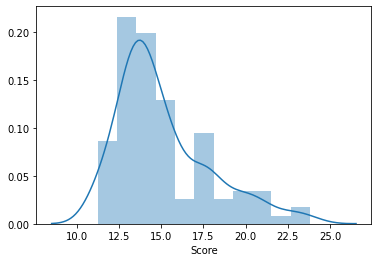

In [0]:
sns.distplot(score)
print(score.skew())

0.721615541913299


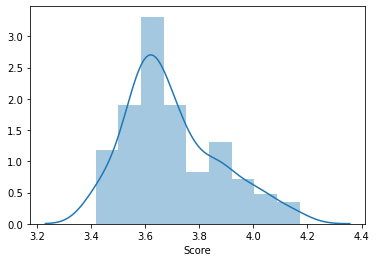

In [0]:
n3= np.log(score)+1
sns.distplot(n3)
print(n3.skew())


In [0]:
def normalize(x):
  x = np.log(x)+1
  return (x-x.min())/(x.max()-x.min())
def generate_vec(txt):
  vecs = []
  for word in txt.split():
    try:
      vecs.append(model.get_vector(word))
    except KeyError:
      continue
  return np.vstack(vecs)
def scoring(x,y):
  xnorm= np.linalg.norm(x)
  ynorm = np.linalg.norm(y)
  dot = np.dot(x,y)
  score = np.linalg.norm(dot/(xnorm*ynorm))
  return score

def get_pairs(job_id):
  result = []
  userids = application_data[application_data['JobID']==(job_id)]["Applicants"].values[0]
  userids = [int(i) for i in userids.split()]
  job_applicants= users[users['UserID'].isin(userids)]
  job_text = jobs[jobs["JobID"]==job_id]["Total"].values[0]
  job_vector = generate_vec(job_text) 
  job_vector_transpose = job_vector.T
  applicant_vectors = job_applicants["Text"].apply(generate_vec).values

  for vec in applicant_vectors:
    score = scoring(vec,job_vector_transpose)
    result.append((np.vstack((vec,job_vector)),score)   )
  return result
  


In [0]:
job_ids = jobs["JobID"].values

In [0]:
total_results = [] 
for j_id in job_ids:
  total_results+=get_pairs(j_id)

In [0]:
del(model)
input_vecs = [i[0] for i in total_results]
scores = [i[1] for i in total_results]
del(total_results)

In [0]:
scores = normalize(scores)

In [0]:
scores = np.float32(scores)

In [0]:
dims = [i.shape[0] for i in input_vecs  ]

In [0]:
len(input_vecs)

31373

In [0]:
input_vecs = np.array(input_vecs)

In [0]:
x_sample,x_other,y_sample,y_other = tts(input_vecs,scores,test_size=0.9)

In [0]:
del(input_vecs)
del(x_other)

In [0]:
for i in range(x_sample.shape[0]):
  x_sample[i] = np.vstack((  x_sample[i],np.zeros((418-x_sample[i].shape[0],300))            ))

In [0]:
dims = [i.shape[1] for i in x_sample  ]

In [0]:
x_op = np.vstack(tuple(x_sample))

In [0]:
x_op = x_op.reshape((-1,418,300))

In [0]:
from tensorflow.keras.layers import Dense,Masking,Input
from tensorflow.keras.models import Model
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split as tts

In [0]:
np.save("regression_training.npy",x_op)
np.save("regression_training_output",y_sample)

NameError: ignored

In [0]:
x_op = np.load("regression_training.npy")
y_sample = np.load("regression_training_output.npy")

In [0]:
x_train,x_test,y_train,y_test = tts(x_op,y_sample,test_size=0.1)

In [0]:
del(x_op)

In [0]:
del(y_sample)

In [0]:
import gc
gc.collect()

5130

In [0]:
import sys
sys.getsizeof(x_train)/(1024**3)

2.637536942958832

In [0]:
x_train,x_val,y_train,y_val = tts(x_train,y_train,test_size=0.05)

In [0]:
x_train = x_train.reshape((-1,418,300,1))
x_val = x_val.reshape((-1,418,300,1))

In [0]:
inp = Input(shape=(418,300,1))
m = Masking()(inp)
conv = tf.keras.layers.Conv2D(filters = 3,kernel_size=(5,5),strides=(5,5),data_format='channels_last',activation='relu')(m)
conv2 = tf.keras.layers.Conv2D(filters = 1,kernel_size=(3,3),strides=(5,5),data_format='channels_last',activation='relu')(conv)
flatten = tf.keras.layers.Flatten()(conv2)
d1 = Dense(100,activation='relu')(flatten)
d2 = Dense(10,activation='relu')(d1)
d3 = Dense(1,activation='sigmoid')(d2)
model=Model(inp,d3)

In [0]:
model.compile(loss='mean_squared_logarithmic_error',optimizer='adam',metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [0]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 418, 300, 1)]     0         
_________________________________________________________________
masking (Masking)            (None, 418, 300, 1)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 83, 60, 3)         78        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 17, 12, 1)         28        
_________________________________________________________________
flatten (Flatten)            (None, 204)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               20500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010  

In [0]:
model.fit(x_train,y_train,epochs=12,batch_size=128)

Epoch 1/12
21/21 [==============================] - 1s 31ms/step - loss: 0.0017 - root_mean_squared_error: 0.0597
Epoch 2/12
21/21 [==============================] - 1s 33ms/step - loss: 0.0015 - root_mean_squared_error: 0.0562
Epoch 3/12
21/21 [==============================] - 1s 31ms/step - loss: 0.0014 - root_mean_squared_error: 0.0545
Epoch 4/12
21/21 [==============================] - 1s 31ms/step - loss: 0.0013 - root_mean_squared_error: 0.0526
Epoch 5/12
21/21 [==============================] - 1s 30ms/step - loss: 0.0013 - root_mean_squared_error: 0.0523
Epoch 6/12
21/21 [==============================] - 1s 30ms/step - loss: 0.0012 - root_mean_squared_error: 0.0511
Epoch 7/12
21/21 [==============================] - 1s 31ms/step - loss: 0.0012 - root_mean_squared_error: 0.0498
Epoch 8/12
21/21 [==============================] - 1s 31ms/step - loss: 0.0011 - root_mean_squared_error: 0.0490
Epoch 9/12
21/21 [==============================] - 1s 31ms/step - loss: 0.0011 - root_m

In [0]:
model.evaluate(x_val,y_val)

5/5 [==============================] - 0s 6ms/step - loss: 0.0119 - root_mean_squared_error: 0.1583


[0.011887798085808754, 0.15828628838062286]

In [0]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


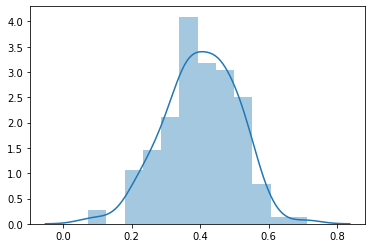

In [0]:
sns.distplot(model.predict(x_val))

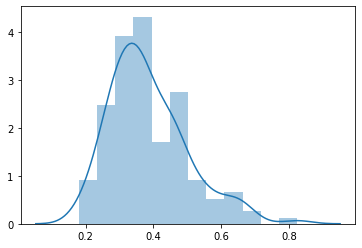

In [0]:
sns.distplot(y_val)